In [1415]:
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import cv2


In [1416]:
im1 = Image.open('/Users/albert/PycharmProjects/test/ImColl/bellucci.jpg')
im1.save('bel.jpg')
im = Image.open('bel.jpg')
im = im.convert('L')
im.save('belorig.jpg')
pix = np.asarray(im.getdata(), dtype=np.float64).reshape((im.size[1], im.size[0]))
print(pix[1][1])
print(pix.ndim)


21.0
2


In [1417]:
def conv2d(input_image, kernel):
    h, w = input_image.shape
    k_h, k_w = kernel.shape
    

    result_h = h - k_h + 1
    result_w = w - k_w + 1
    sum0 = 0
    sum1 = 0
    sum2 = 0

    result = np.zeros((result_h, result_w))
    for i in range(result_h):
        for j in range(result_w):
            for k in range(k_h):
                for p in range(k_w):
                    sum0 += kernel[k][p]*input_image[i + k][j + p]
            result[i][j] = sum0
            sum0 = 0
            sum1 = 0
            sum2 = 0

    
    
            
    return result      

In [1418]:

# pix = np.asarray(im.getdata(), dtype=np.float64).reshape((im.size[1], im.size[0]))

In [1419]:
b = 0
while b < 256:
    for a in pix[b]:
        if a > 0:
            a -= 1
    b += 1

In [1420]:
def distance(x1, y1, z1, x2, y2, z2):
    return ((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)**(1/2)

In [1421]:
AQQURACY = 10

In [1422]:
#test
i = 120

while i < 150:
    # pix[142][i] = 255
    # pix[143][i] = 255
    # pix[144][i] = 255
    # pix[145][i] = 255
    # pix[146][i] = 255
    # pix[147][i] = 255
    # pix[148][i] = 255
    # pix[149][i] = 255
    pix[132][i] = 255
    pix[133][i] = 255
    pix[134][i] = 255
    pix[135][i] = 255
    pix[136][i] = 255
    pix[137][i] = 255
    pix[138][i] = 255
    pix[139][i] = 255
    # pix[122][i] = 255
    # pix[123][i] = 255
    # pix[124][i] = 255
    # pix[125][i] = 255
    # pix[126][i] = 255
    # pix[127][i] = 255
    # pix[128][i] = 255
    # pix[129][i] = 255
    # pix[112][i] = 255
    # pix[113][i] = 255
    # pix[114][i] = 255
    # pix[115][i] = 255
    # pix[116][i] = 255
    # pix[117][i] = 255
    # pix[118][i] = 255
    # pix[119][i] = 255
    i += 1

In [1423]:
f_y = np.zeros((256, 256))
f_x = np.zeros((256, 256))

In [1424]:
kernel_x = np.zeros((3,3))

kernel_x[0] = [-1, 0, 1]
kernel_x[1] = [-2, 0, 2]
kernel_x[2] = [-1, 0, 1]


kernel_y = np.zeros((3,3))

kernel_y[0] = [1, 2, 1]
kernel_y[1] = [0, 0, 0]
kernel_y[2] = [-1, -2, -1]


kernel_x = kernel_x / 12
kernel_y = kernel_y / 12

In [1425]:
i = 1
j = 1

# Поиск градиента изображения



f_x = cv2.filter2D(pix, -1, kernel_x)
f_y = cv2.filter2D(pix, -1, kernel_y)

# while i < 255:
#     while j < 255:
#         if pix[i][j] == 255:
#             f_x[i][j] = 255
#             f_y[i][j] = 255
#             j += 1
#             continue

#         if (pix[i][j+1] != 255) and (pix[i][j-1] != 255):
#             f_x[i][j] = (pix[i][j+1] - pix[i][j-1])/2
#         elif (pix[i][j+1] == 255) and (pix[i][j-1] != 255):
#             f_x[i][j] = pix[i][j] - pix[i][j-1]
#         elif (pix[i][j+1] != 255) and (pix[i][j-1] == 255):
#             f_x[i][j] = pix[i][j+1] - pix[i][j]
#         else:
#             f_x[i][j] = 255



#         if (pix[i+1][j] != 255) and (pix[i-1][j] != 255):
#             f_y[i][j] = (pix[i+1][j] - pix[i-1][j])/2
#         elif (pix[i+1][j] == 255) and (pix[i-1][j] != 255):
#             f_y[i][j] = pix[i][j] - pix[i-1][j]
#         elif (pix[i+1][j] != 255) and (pix[i-1][j] == 255):
#             f_y[i][j] = pix[i+1][j] - pix[i][j]
#         else:
#             f_y[i][j] = 255

#         j += 1

#     i += 1
#     j = 1

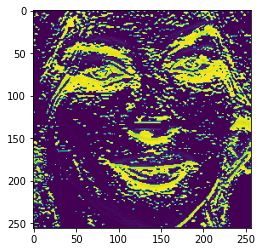

In [1426]:
plt.imshow(f_y.astype(np.uint8))

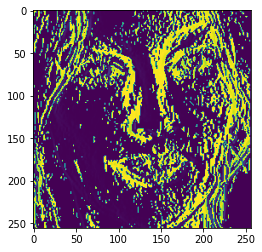

In [1427]:
plt.imshow(f_x.astype(np.uint8))

In [1428]:
# Создадим сетку theta
N = 32

x_y_theta = np.zeros((256, 256, N))





In [1429]:
val_theta = np.zeros(N)
for i in range(1, N, 1):
    val_theta[i] = val_theta[i-1] + math.pi/(N-1)

In [1430]:
val_theta

array([0.        , 0.1013417 , 0.2026834 , 0.3040251 , 0.40536679,
       0.50670849, 0.60805019, 0.70939189, 0.81073359, 0.91207529,
       1.01341699, 1.11475868, 1.21610038, 1.31744208, 1.41878378,
       1.52012548, 1.62146718, 1.72280887, 1.82415057, 1.92549227,
       2.02683397, 2.12817567, 2.22951737, 2.33085907, 2.43220076,
       2.53354246, 2.63488416, 2.73622586, 2.83756756, 2.93890926,
       3.04025096, 3.14159265])

In [1431]:
i = 1
j = 1
p = np.zeros_like(f_x)

# ТУТ НАДО МЕНЯТЬ И НОРМАЛЬНО ОПРЕДЕЛЯТЬ p[i][j]
#!!!НАДО ЗАРАНЕЕ СОЗДАТЬ СЕТКУ ДЛЯ theta из N > 30


x, y = p.shape


for i in range(y):
    for j in range(x):
        if pix[i][j] != 255:
            if f_y[i][j] != 0:
                p[i][j] = float('{:.5f}'.format(- math.atan(f_x[i][j]/f_y[i][j]))) + math.pi/2
            elif f_y[i][j] == 0 and f_x[i][j] != 0:
                p[i][j] = 0 
            else:
                p[i][j] = -1
        else:
            p[i][j] = 255




    






# nx, ny = 254, 254
# x = range(nx) 
# y = range(ny) 

# hf = plt.figure() 
# ha = hf.add_subplot(111, projection='3d') 
# X, Y = np.meshgrid(x, y) # `plot_surface` expects `x` and `y` data to be 2D 
# ha.plot_surface(X, Y, p) 



In [1432]:
# Окончательно сформируем сетку (x, y, theta), в узлах которой лежит значение пикселя. 

NewPix = np.zeros((256, 256, N))

for i in range(y):
    for j in range(x):
        if p[i][j] != 255:
            if p[i][j] == -1:
                for k in range(N):
                    NewPix[i][j][k] = pix[i][j]/N
                    
            else:
                NewPix[i][j][round((p[i][j] * 31)/ math.pi)] = pix[i][j]
                

In [1433]:
NewPixCopy = NewPix.copy()

In [1434]:
# Эти строки задают квадрат через 4 точки в следующем виде
#     |
#  ---|---
#     |

MainSq = np.zeros((4,2), dtype=int)

MainSq[0] = [1, 4]

In [1435]:
def CreateKernel(square_radius):
    kernel1 = np.zeros((square_radius * 2 + 1, square_radius * 2 + 1, square_radius * 2 + 1))
    for a in range(square_radius * 2 + 1):
        for b in range(square_radius * 2 + 1):
            for c in range(square_radius * 2 + 1):
                kernel1[a][b][c] = distance(a, b, c, square_radius, square_radius, square_radius)
    kernel1 = kernel1/kernel1.sum()

    kernel_sum = kernel1.sum()

    print(kernel_sum)

    kernel2 = np.zeros((square_radius * 2 + 1, square_radius * 2 + 1, square_radius * 2 + 1))

    for a in range(square_radius * 2 + 1):
        for b in range(square_radius * 2 + 1):
            for c in range(square_radius * 2 + 1):
                kernel2[a][b][c] = kernel_sum - kernel1[a][b][c]
    return kernel2

In [1436]:
def FormNeighborhood(square_radius, ker, x, y, z):
    # Переопределим размер нашего ядра (по факту padding)
    
    Nx_min = -square_radius
    Nx_max = square_radius
    Ny_min = -square_radius
    Ny_max = square_radius
    Nz_min = -square_radius
    Nz_max = square_radius

    if 255 - x < square_radius:
        Nx_max = 255 - x
    if 0 - x > -square_radius:
        Nx_min = 0 - x

    if 255 - y < square_radius:
        Ny_max = 255 - y
    if 0 - y > -square_radius:
        Ny_min = 0 - y

    if 31 - z < square_radius:
        Nz_max = 31 - z
    if 0 - z > -square_radius:
        Nz_min = 0 - z    

    suma = 0    
    count = -1
    for a in range(Nx_min, Nx_max + 1, 1):
        for b in range(Ny_min, Ny_max + 1, 1):
            for c in range(Nz_min, Nz_max + 1, 1):
                # print(NewPix[a + x][b + y][c + z])
                if (a == 0) and (b == 0) and (c == 0):
                    continue
                if (NewPix[a + x][b + y][c + z] != 0):
                    suma += NewPix[a + x][b + y][c + z] * ker[a + square_radius][b + square_radius][c + square_radius]
                    count += 1
                    
    if count != 0:
        NewPixCopy[x][y][z] = suma/count
    else:
        NewPixCopy[x][y][z] = suma
    # print(suma/count)
    # print(NewPix[x][y][z])
                

In [1437]:
ker = CreateKernel(9)

1.0


In [1438]:
# for k in range(32):
#     FormNeighborhood(9, ker, 139, 135, k)

In [1439]:
print(NewPix[139][135])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [1440]:
print(pix[140][135])

74.0


In [1441]:
# Реализаци алгоритма работы в пределах окрестности (полный перебор всех пикселей в окрестности a.k.a 3 мерная свертка)
damaged_pix = 0
ker = CreateKernel(13)

for i in range(y):
    for j in range(x):
        if pix[i][j] == 255.0:
            damaged_pix += 1

        
pixcopy = pix.copy()
max_elem_theta = 0
min_elem_theta = 256
max_max = 0
min_min = 256
while damaged_pix > 0:
    for i in range(y):
        for j in range(x):
            if pix[i][j] == 255.0:
                for k in range(N):
                    FormNeighborhood(13, ker, i, j, k)
                    if NewPixCopy[i][j][k] > max_elem_theta:
                        max_elem_theta = NewPixCopy[i][j][k]
                    
                    if NewPixCopy[i][j][k] < min_elem_theta:
                        min_elem_theta = NewPixCopy[i][j][k]
                        # print(max_elem_theta)
                damaged_pix -= 1
                # pixcopy[i][j] = max_elem_theta
                pixcopy[i][j] = min_elem_theta
                # if max_elem_theta > max_max:
                    # max_max = max_elem_theta
                max_elem_theta = 0
        # print(i)
    # print(damaged_pix)
    # pix = pixcopy.copy()


1.0000000000000002


In [1442]:
# for i in range(y):
#     for j in range(x):
#         if pix[i][j] == 255.0:
#             pix[i][j] = (1 - pixcopy[i][j]/ max_max) * 255

213.82227209374855

In [1443]:
# # Реализуем алгоритм поиска

# damaged_pix = 0

# for i in range(y):
#     for j in range(x):
#         if pix[i][j] == 255.0:
#             damaged_pix += 1

        
# pixcopy = pix.copy()

# while damaged_pix > 0:

#     while i < 255:
#         while j < 255:
#             if pix[i][j] == 255.0:  # если нашел поврежденный пиксель
                
#                 while i + x < 256:  # поиск вниз
#                     if pix[i + x][j] == 255.0:
#                         x += 1
#                     else:
#                         break

#                 if i + x >= 256:
#                     x -= 1

#                 MainSq[0] = [i + x, j] 
#                 x = 1




#                 while i - x >= 0:  # поиск вверх
#                     if pix[i - x][j] == 255.0:
#                         x += 1
#                     else:
#                         break

#                 if i - x < 0:
#                     x -= 1

#                 MainSq[1] = [i - x, j]
#                 x = 1

#                 while j + x < 256:  # поиск вправо
#                     if pix[i][j + x] == 255.0:
#                         x += 1
#                     else:
#                         break

#                 if j + x >= 256:
#                     x -= 1

#                 MainSq[2] = [i, j + x]
#                 x = 1

#                 while j - x >= 0:  # поиск влево
#                     if pix[i][j - x] == 255.0:
#                         x += 1
#                     else:
#                         break

#                 if j - x < 0:
#                     x -= 1

#                 MainSq[3] = [i, j - x]

#                 x = 1

#                 a = min(p[MainSq[0][0]][MainSq[0][1]], p[MainSq[1][0]][MainSq[1][1]], p[MainSq[2][0]][MainSq[2][1]], p[MainSq[3][0]][MainSq[3][1]])
#                 b = max(p[MainSq[0][0]][MainSq[0][1]], p[MainSq[1][0]][MainSq[1][1]], p[MainSq[2][0]][MainSq[2][1]], p[MainSq[3][0]][MainSq[3][1]])

#                 a = round(a * 31 / math.pi)
#                 b = round(b * 31 / math.pi)
#                 for k in range (a, b + 1, 1):
#                     dist0 = distance(i, j, k, MainSq[0][0], MainSq[0][1], round(p[MainSq[0][0]][MainSq[0][1]] * 31 / math.pi))
#                     dist1 = distance(i, j, k, MainSq[1][0], MainSq[1][1], round(p[MainSq[1][0]][MainSq[1][1]] * 31 / math.pi))
#                     dist2 = distance(i, j, k, MainSq[2][0], MainSq[2][1], round(p[MainSq[2][0]][MainSq[2][1]] * 31 / math.pi))
#                     dist3 = distance(i, j, k, MainSq[3][0], MainSq[3][1], round(p[MainSq[3][0]][MainSq[3][1]] * 31 / math.pi))
#                     if dist0 < 0 or dist1 < 0 or dist2 < 0 or dist3 < 0:
#                         print("-1 ERROR")
#                         return

#                     NewPix[i][j][k] = pix[MainSq[0][0]][MainSq[0][1]] * (dist1 + dist2 + dist3) + pix[MainSq[1][0]][MainSq[1][1]] * (dist0 + dist2 + dist3) + pix[MainSq[2][0]][MainSq[2][1]] * (dist1 + dist0 + dist3) + pix[MainSq[3][0]][MainSq[3][1]] * (dist1 + dist2 + dist0)

#                     NewPix[i][j][k] = NewPix[i][j][k] / (3 * (dist0 + dist1 + dist2 + dist3)) 

In [1444]:
for q in range(1, 6, 1):
   print(q)


1
2
3
4
5


In [1445]:
pix = pixcopy.copy()

In [1446]:
print(NewPix[135][10])
for item in NewPix[135][10]:
    print(item, end=' ')
print()

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 13.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 13.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 


In [1447]:
print(pix[140][130])

6.0


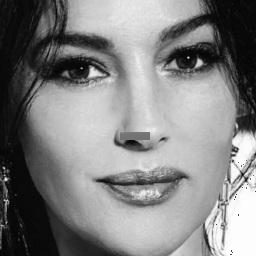

In [1450]:
pix = np.asarray(pix, dtype=np.uint8)

ImRes = Image.fromarray(pix, mode='L')
display(ImRes)
ImRes.show()

In [1449]:
print(NewPix[131][135])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. 194.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.]
